In [13]:
# Adapted from M.X. Cohen

import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image
from skimage import filters
import scipy.ndimage as ndimage
import scipy
import imageio
from skimage import exposure

In [8]:
fshape=(3300, 2350)

# Test 1

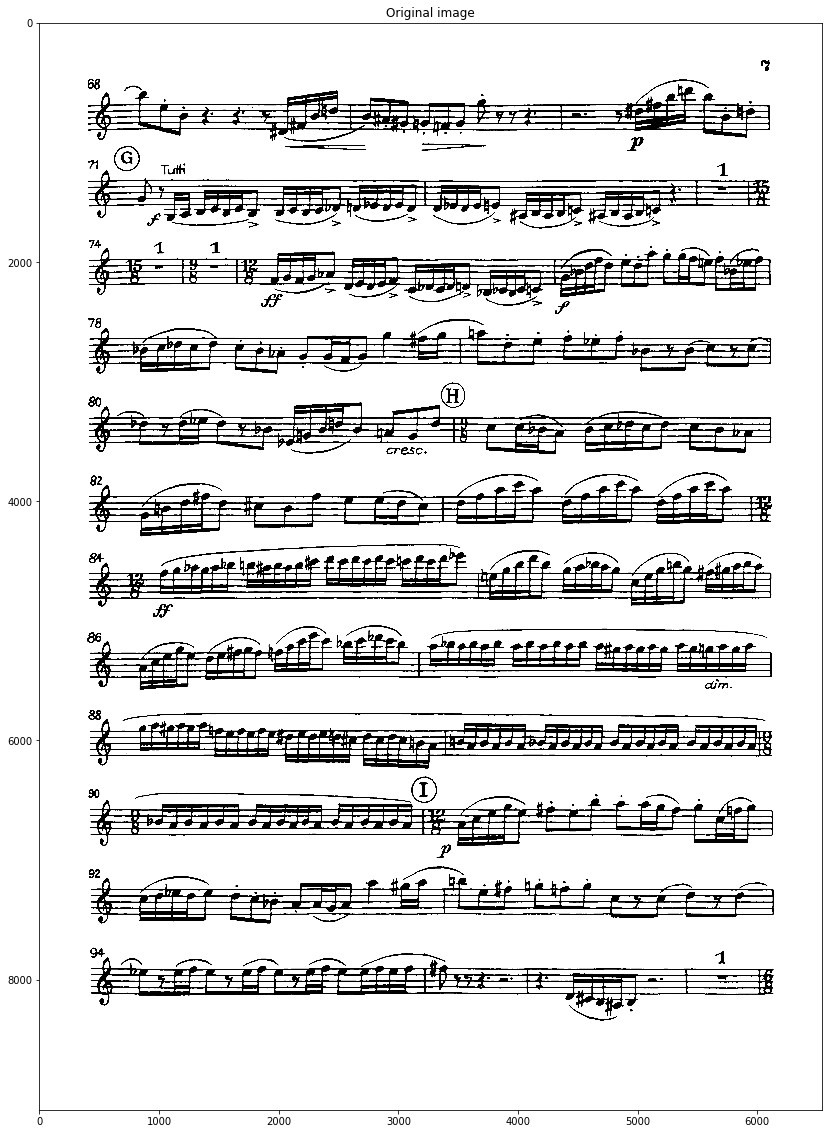

In [6]:
hindemith = np.asarray(Image.open("./data/hindemith_clarinet_7.jpg"))
red = hindemith[..., 0]
green = hindemith[..., 1]
blue = hindemith[..., 2]

hindemith = 0.21 * red + 0.72 * green + 0.07 * blue

# plot original image
plt.figure(figsize=(30, 20))
plt.imshow(hindemith, cmap=plt.cm.gray)
plt.title('Original image')

plt.show()


Text(0.5, 1.0, 'Amplitude spectrum')

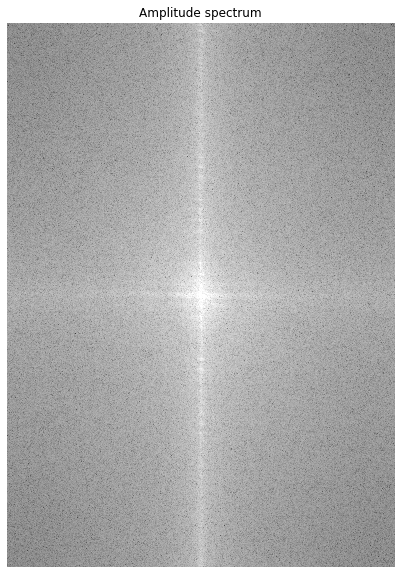

In [9]:

# and its power spectrum
imgX_hindemith  = scipy.fftpack.fftshift(scipy.fftpack.fft2(hindemith, fshape))
powr2 = np.log(np.abs(imgX_hindemith))

plt.figure(figsize=(20, 10))
plt.imshow(powr2, cmap=plt.cm.gray)
plt.clim([0, 15])
plt.axis('off')
plt.title('Amplitude spectrum')

Apply Test 9

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


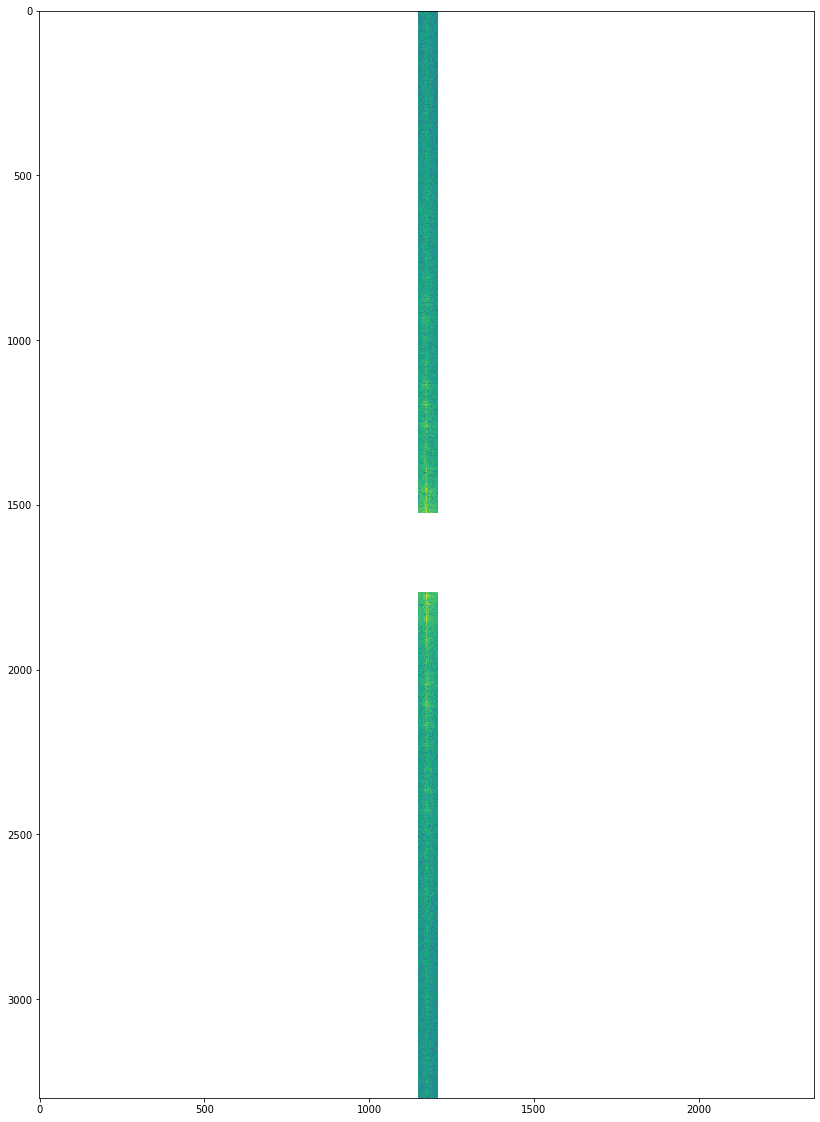

In [10]:
test9_hindemith=imgX_hindemith.copy()
test9_hindemith[0: 3300-1, 0: 1150]=0
test9_hindemith[0: 3300-1, 1210: 2350-1]=0

test9_hindemith[1525:1765, 0: 2350-1]=0

#test5[2000:3300-1, 1150: 1210]=0
plt.figure(figsize=(30, 20))
plt.imshow(np.log(np.abs(test9_hindemith)))



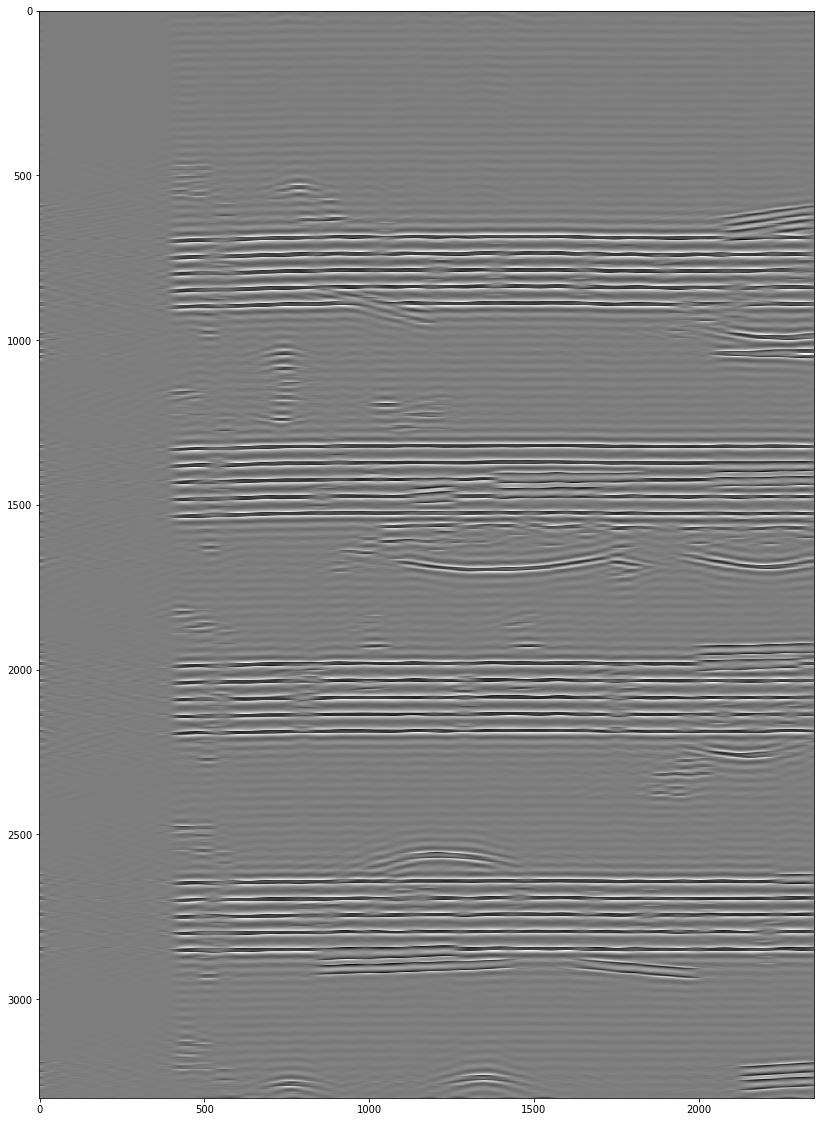

In [12]:
imgrecon_hindemith = np.real(scipy.fftpack.ifft2(scipy.fftpack.fftshift((test9_hindemith))))
plt.figure(figsize=(30, 20))
plt.imshow(imgrecon_hindemith, cmap=plt.cm.gray)


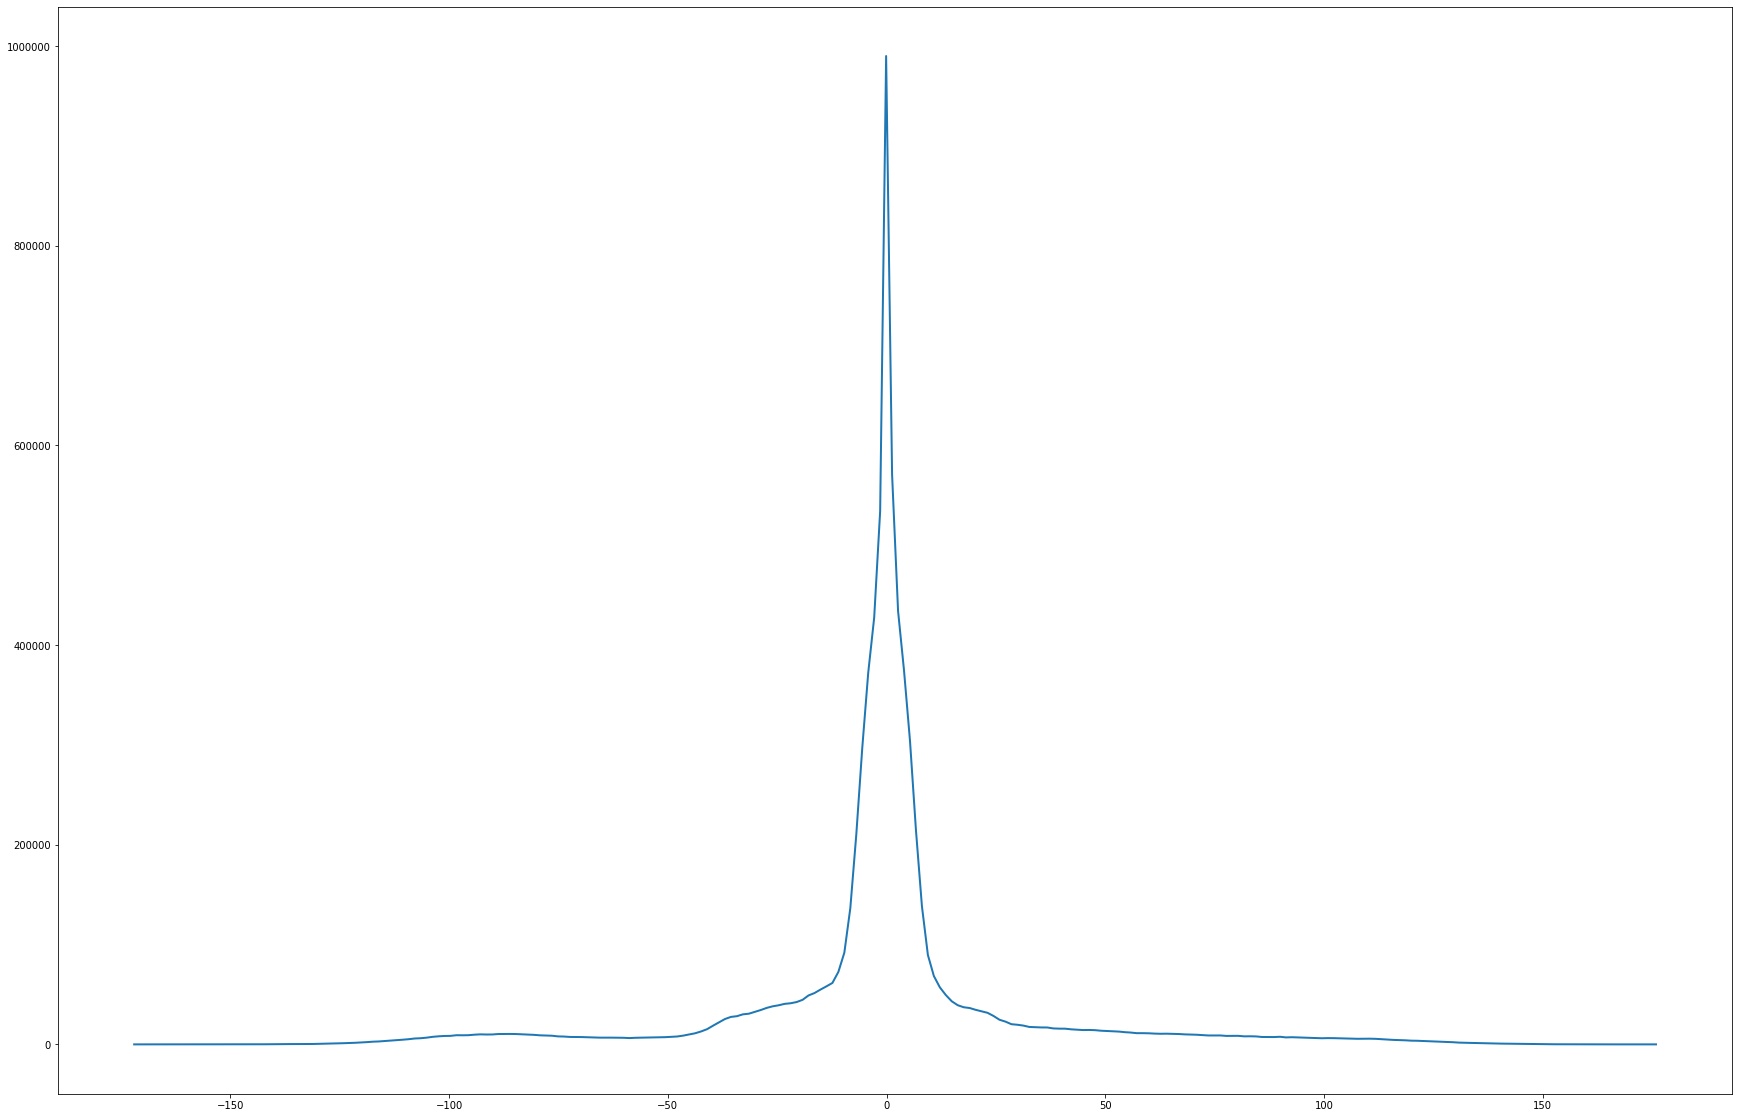

In [14]:

plt.figure(figsize=(30, 20))
hist, bins_center = exposure.histogram(imgrecon_hindemith)
plt.plot(bins_center, hist, lw=2)
plt.show()

(-0.5, 2349.5, 3299.5, -0.5)

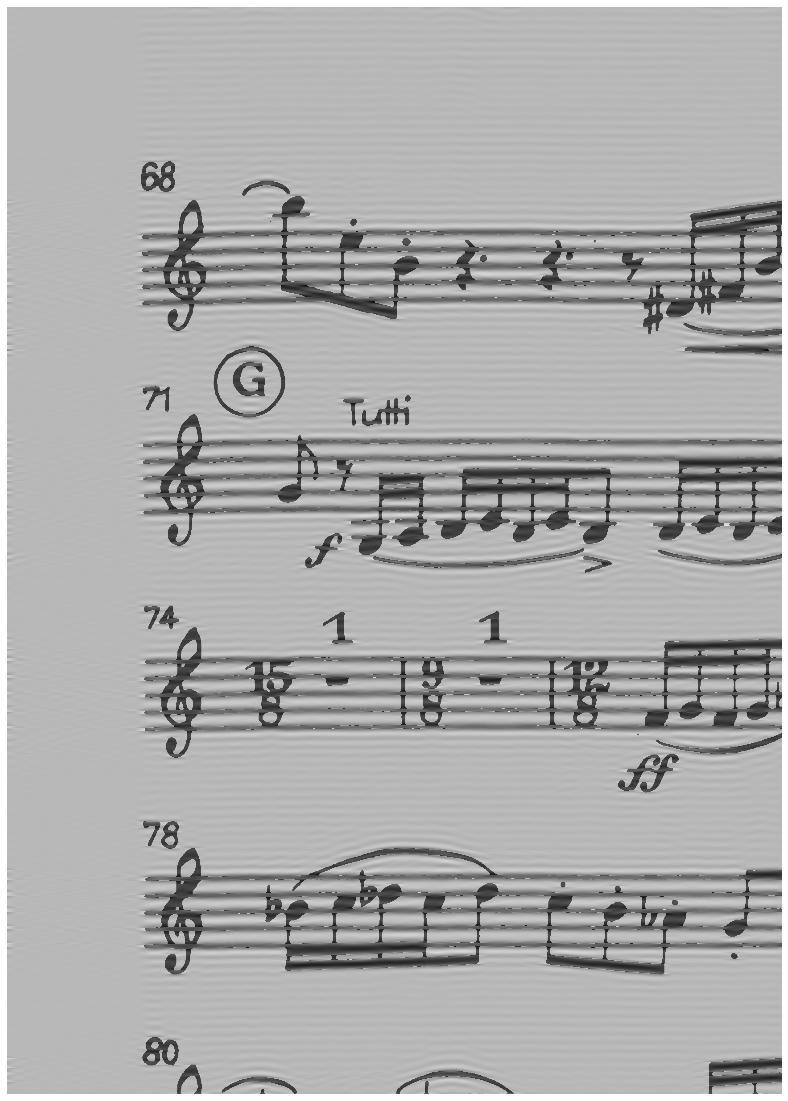

In [15]:
test_notes_hindemith=imgX_hindemith.copy()
test_notes_hindemith[0:1525, 1150:1210]=0
test_notes_hindemith[1765: 3300-1, 1150:1210]=0


notes_hindemith = np.real(scipy.fftpack.ifft2(scipy.fftpack.fftshift((test_notes_hindemith))))
plt.figure(figsize=(30, 20))
plt.imshow(notes_hindemith, cmap=plt.cm.gray)
plt.axis('off')

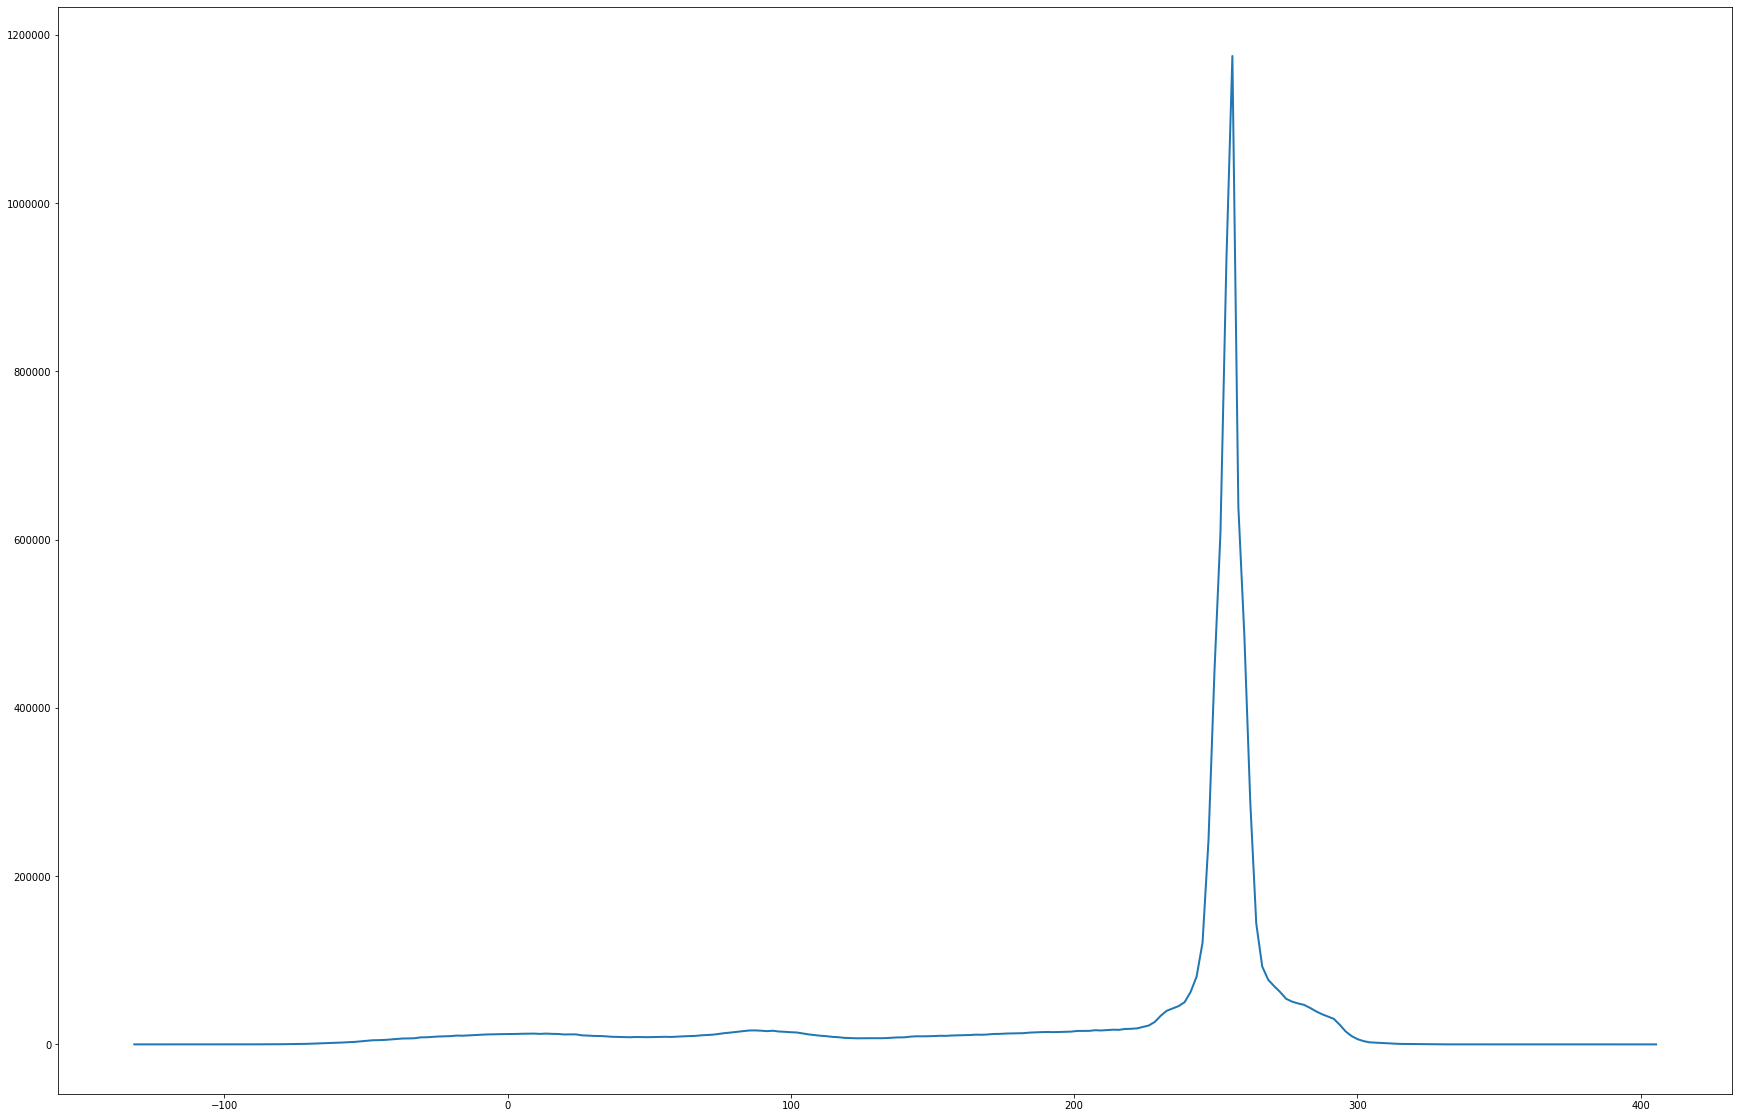

In [16]:

plt.figure(figsize=(30, 20))
hist, bins_center = exposure.histogram(notes_hindemith)
plt.plot(bins_center, hist, lw=2)
plt.show()

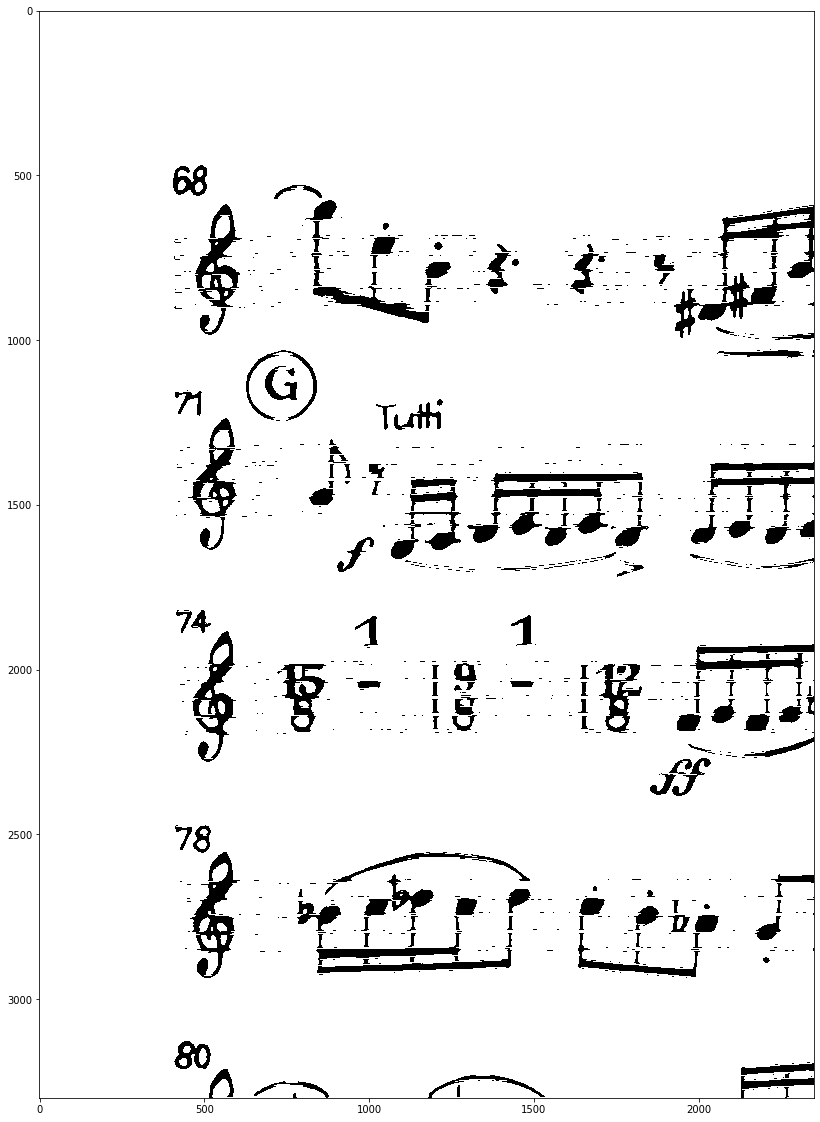

In [18]:
thresh_note9=50
plt.figure(figsize=(30, 20))
plt.imshow(~(notes_hindemith < thresh_note9), cmap=plt.cm.gray)
